In [2]:
"jai shri RAM"

'jai shri RAM'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("Pages/heart_disease.csv")

In [5]:
df.duplicated().sum()

np.int64(0)

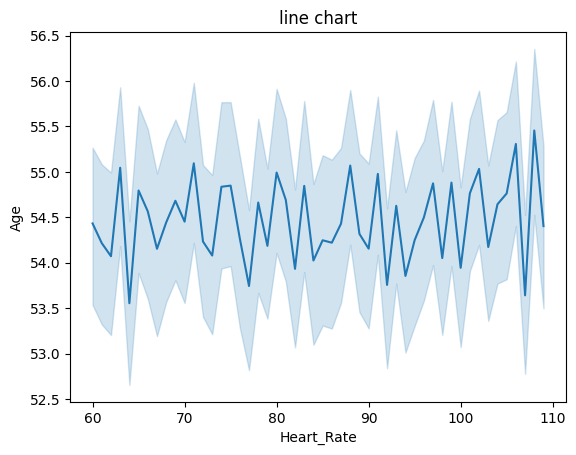

In [8]:
sns.lineplot(x="Heart_Rate", y= 'Age', data=df)

plt.title("line chart")
plt.show()

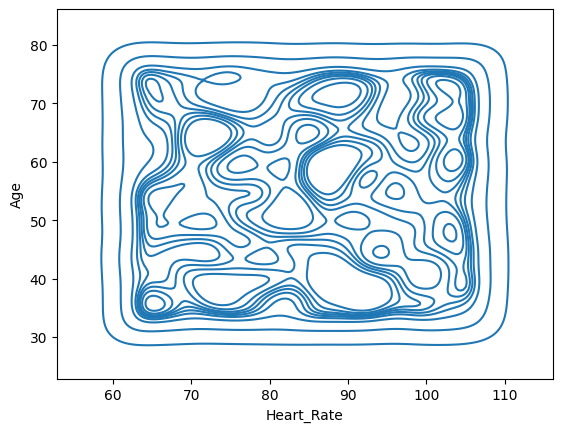

In [9]:
sns.kdeplot(x="Heart_Rate", y= 'Age', data=df)
plt.show()

In [ ]:
sns.kdeplot(x="Stress_Level", y= 'Systolic_BP', data=df)
plt.show()

In [6]:
df

Age  Gender  Weight  Height   BMI  Smoking Alcohol_Intake  \
0       48    Male      78     157  26.4    Never            NaN   
1       35  Female      73     163  33.0    Never            Low   
2       79  Female      88     152  32.3    Never            NaN   
3       75    Male     106     171  37.4    Never       Moderate   
4       34  Female      65     191  18.5  Current            NaN   
...    ...     ...     ...     ...   ...      ...            ...   
49995   74    Male     104     155  29.9  Current            NaN   
49996   53    Male      95     163  35.8    Never            Low   
49997   38  Female      91     197  32.3   Former            Low   
49998   68    Male     115     152  18.6    Never           High   
49999   53  Female      81     193  21.7    Never            Low   

      Physical_Activity       Diet Stress_Level  ...  Diabetes  \
0             Sedentary    Healthy       Medium  ...         0   
1                Active    Average         High  ...         0   
2              Moderate    Average       Medium  ...         0   
3              Moderate    Average          Low  ...         0   
4             Sedentary    Healthy          Low  ...         1   
...                 ...        ...          ...  ...       ...   
49995            Active    Average       Medium  ...         0   
49996          Moderate    Healthy          Low  ...         0   
49997          Moderate  Unhealthy          Low  ...         0   
49998          Moderate    Average       Medium  ...         0   
49999          Moderate    Average          Low  ...         0   

       Hyperlipidemia  Family_History  Previous_Heart_Attack  Systolic_BP  \
0                   1               1                      0          104   
1                   1               1                      0          111   
2                   0               1                      0          116   
3                   1               0                      0          171   
4                   0               0                      0          164   
...               ...             ...                    ...          ...   
49995               0               0                      0          127   
49996               1               0                      0          141   
49997               0               0                      0          178   
49998               0               0                      0          118   
49999               0               0                      0          108   

       Diastolic_BP  Heart_Rate  Blood_Sugar_Fasting  Cholesterol_Total  \
0                99          71                  165                200   
1                72          60                  145                206   
2               102          78                  148                208   
3                92         109                  105                290   
4                67         108                  116                220   
...             ...         ...                  ...                ...   
49995            80          83                  174                248   
49996            96          70                  148                252   
49997            94          90                   75                235   
49998           110         106                  113                177   
49999           111          87                  172                280   

       Heart_Disease  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  
...              ...  
49995              1  
49996              0  
49997              0  
49998              0  
49999              1  

[50000 rows x 21 columns]

In [7]:
df.describe()

Age        Weight        Height           BMI  Hypertension  \
count  50000.00000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      54.46406     84.547520    174.460000     28.984284      0.299620   
std       14.43809     20.213257     14.420379      6.367494      0.458096   
min       30.00000     50.000000    150.000000     18.000000      0.000000   
25%       42.00000     67.000000    162.000000     23.500000      0.000000   
50%       54.00000     85.000000    174.000000     29.000000      0.000000   
75%       67.00000    102.000000    187.000000     34.500000      1.000000   
max       79.00000    119.000000    199.000000     40.000000      1.000000   

           Diabetes  Hyperlipidemia  Family_History  Previous_Heart_Attack  \
count  50000.000000    50000.000000    50000.000000           50000.000000   
mean       0.199260        0.251660        0.400500               0.099280   
std        0.399448        0.433971        0.490005               0.299041   
min        0.000000        0.000000        0.000000               0.000000   
25%        0.000000        0.000000        0.000000               0.000000   
50%        0.000000        0.000000        0.000000               0.000000   
75%        0.000000        1.000000        1.000000               0.000000   
max        1.000000        1.000000        1.000000               1.000000   

        Systolic_BP  Diastolic_BP    Heart_Rate  Blood_Sugar_Fasting  \
count  50000.000000  50000.000000  50000.000000         50000.000000   
mean     139.299580     89.528800     84.449560           124.493020   
std       23.083544     17.258063     14.491325            31.691507   
min      100.000000     60.000000     60.000000            70.000000   
25%      119.000000     75.000000     72.000000            97.000000   
50%      139.000000     90.000000     85.000000           125.000000   
75%      159.000000    104.000000     97.000000           152.000000   
max      179.000000    119.000000    109.000000           179.000000   

       Cholesterol_Total  Heart_Disease  
count       50000.000000   50000.000000  
mean          224.556360       0.463460  
std            43.157467       0.498668  
min           150.000000       0.000000  
25%           187.000000       0.000000  
50%           225.000000       0.000000  
75%           262.000000       1.000000  
max           299.000000       1.000000

In [9]:
df["Hypertension"].unique()

array([0, 1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non-null  int64  
 15  Sy

In [11]:
df.isnull().sum()

Age                          0
Gender                       0
Weight                       0
Height                       0
BMI                          0
Smoking                      0
Alcohol_Intake           20109
Physical_Activity            0
Diet                         0
Stress_Level                 0
Hypertension                 0
Diabetes                     0
Hyperlipidemia               0
Family_History               0
Previous_Heart_Attack        0
Systolic_BP                  0
Diastolic_BP                 0
Heart_Rate                   0
Blood_Sugar_Fasting          0
Cholesterol_Total            0
Heart_Disease                0
dtype: int64

**DATA CLEANING :-**

In [12]:
df.sample(10)

Age  Gender  Weight  Height   BMI  Smoking Alcohol_Intake  \
36439   61    Male     103     168  39.3  Current            NaN   
44333   49    Male     107     197  39.6  Current            NaN   
18075   68  Female     106     150  29.7    Never            Low   
15242   34  Female      86     159  22.2    Never            Low   
40332   47    Male      96     187  31.8  Current       Moderate   
13823   67    Male      88     193  35.9    Never            Low   
28969   35    Male      93     195  24.7  Current           High   
48891   64  Female     107     166  24.7    Never            NaN   
9546    75  Female      75     198  18.8    Never            NaN   
16373   49    Male     112     181  37.5    Never            Low   

      Physical_Activity       Diet Stress_Level  ...  Diabetes  \
36439         Sedentary    Average       Medium  ...         0   
44333            Active  Unhealthy          Low  ...         0   
18075         Sedentary    Average          Low  ...         0   
15242          Moderate  Unhealthy         High  ...         0   
40332          Moderate    Healthy       Medium  ...         0   
13823            Active    Average       Medium  ...         0   
28969          Moderate    Average         High  ...         0   
48891          Moderate    Average          Low  ...         0   
9546           Moderate    Healthy          Low  ...         0   
16373         Sedentary    Healthy       Medium  ...         1   

       Hyperlipidemia  Family_History  Previous_Heart_Attack  Systolic_BP  \
36439               0               0                      0          127   
44333               0               1                      0          150   
18075               0               1                      0          161   
15242               0               1                      0          103   
40332               0               0                      0          146   
13823               0               0                      0          155   
28969               0               0                      0          117   
48891               1               0                      0          165   
9546                0               0                      0          118   
16373               0               1                      0          107   

       Diastolic_BP  Heart_Rate  Blood_Sugar_Fasting  Cholesterol_Total  \
36439            61          80                  116                239   
44333           104         101                   89                214   
18075            92         103                  122                174   
15242            90          77                  130                171   
40332            67          82                   96                233   
13823            90          84                  120                278   
28969            89          77                   93                223   
48891           117          92                   79                210   
9546             65          94                   79                236   
16373           110          77                   98                239   

       Heart_Disease  
36439              0  
44333              0  
18075              1  
15242              0  
40332              0  
13823              1  
28969              0  
48891              0  
9546               0  
16373              0  

[10 rows x 21 columns]

In [12]:
x=["Systolic_BP","Diastolic_BP","Hypertention","Heart_Rate","Cholesterol_Total"]
y=df.mean_value()
plt.bar(x,y)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'mean_value'

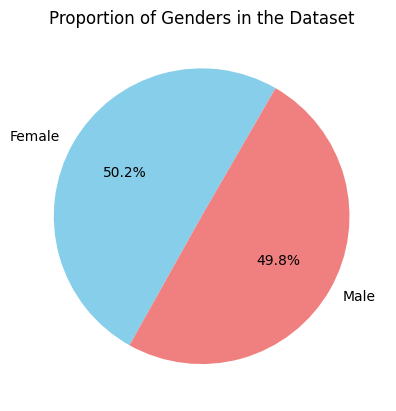

In [13]:

gender_counts = df["Gender"].value_counts()


plt.pie(
    gender_counts.values,
    labels=gender_counts.index, 
    autopct='%1.1f%%',
    startangle=60,
    colors=['skyblue', 'lightcoral']
)
plt.title("Proportion of Genders in the Dataset")
plt.show()

In [14]:
df["Stress_Level"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [15]:
m = df["Alcohol_Intake"].mode()[0]
df["Alcohol_Intake"] = df["Alcohol_Intake"].fillna(m)

In [16]:
## Gender :-
df["Gender"]=lr.fit_transform(df["Gender"])

## Smoking :-
df["Smoking"]=lr.fit_transform(df["Smoking"])

## Alcohol_Intake :-
df["Alcohol_Intake"]=lr.fit_transform(df["Alcohol_Intake"])

## Physical_Activity :-
df["Physical_Activity"]=lr.fit_transform(df["Physical_Activity"])

## Diet :-
df["Diet"]=lr.fit_transform(df["Diet"])

## Stress_Level :-
df["Stress_Level"]=lr.fit_transform(df["Stress_Level"])


**MODEL TRAIN**

In [17]:
df

Age  Gender  Weight  Height   BMI  Smoking  Alcohol_Intake  \
0       48       1      78     157  26.4        2               1   
1       35       0      73     163  33.0        2               1   
2       79       0      88     152  32.3        2               1   
3       75       1     106     171  37.4        2               2   
4       34       0      65     191  18.5        0               1   
...    ...     ...     ...     ...   ...      ...             ...   
49995   74       1     104     155  29.9        0               1   
49996   53       1      95     163  35.8        2               1   
49997   38       0      91     197  32.3        1               1   
49998   68       1     115     152  18.6        2               0   
49999   53       0      81     193  21.7        2               1   

       Physical_Activity  Diet  Stress_Level  ...  Diabetes  Hyperlipidemia  \
0                      2     1             2  ...         0               1   
1                      0     0             0  ...         0               1   
2                      1     0             2  ...         0               0   
3                      1     0             1  ...         0               1   
4                      2     1             1  ...         1               0   
...                  ...   ...           ...  ...       ...             ...   
49995                  0     0             2  ...         0               0   
49996                  1     1             1  ...         0               1   
49997                  1     2             1  ...         0               0   
49998                  1     0             2  ...         0               0   
49999                  1     0             1  ...         0               0   

       Family_History  Previous_Heart_Attack  Systolic_BP  Diastolic_BP  \
0                   1                      0          104            99   
1                   1                      0          111            72   
2                   1                      0          116           102   
3                   0                      0          171            92   
4                   0                      0          164            67   
...               ...                    ...          ...           ...   
49995               0                      0          127            80   
49996               0                      0          141            96   
49997               0                      0          178            94   
49998               0                      0          118           110   
49999               0                      0          108           111   

       Heart_Rate  Blood_Sugar_Fasting  Cholesterol_Total  Heart_Disease  
0              71                  165                200              0  
1              60                  145                206              0  
2              78                  148                208              0  
3             109                  105                290              1  
4             108                  116                220              1  
...           ...                  ...                ...            ...  
49995          83                  174                248              1  
49996          70                  148                252              0  
49997          90                   75                235              0  
49998         106                  113                177              0  
49999          87                  172                280              1  

[50000 rows x 21 columns]

In [18]:
x1=df.drop(columns=["Heart_Disease","Weight","Height","Alcohol_Intake"])

x=pd.DataFrame(x1)

y=df[["Heart_Disease"]]

In [19]:
x

Age  Gender   BMI  Smoking  Physical_Activity  Diet  Stress_Level  \
0       48       1  26.4        2                  2     1             2   
1       35       0  33.0        2                  0     0             0   
2       79       0  32.3        2                  1     0             2   
3       75       1  37.4        2                  1     0             1   
4       34       0  18.5        0                  2     1             1   
...    ...     ...   ...      ...                ...   ...           ...   
49995   74       1  29.9        0                  0     0             2   
49996   53       1  35.8        2                  1     1             1   
49997   38       0  32.3        1                  1     2             1   
49998   68       1  18.6        2                  1     0             2   
49999   53       0  21.7        2                  1     0             1   

       Hypertension  Diabetes  Hyperlipidemia  Family_History  \
0                 0         0               1               1   
1                 1         0               1               1   
2                 0         0               0               1   
3                 0         0               1               0   
4                 1         1               0               0   
...             ...       ...             ...             ...   
49995             0         0               0               0   
49996             0         0               1               0   
49997             0         0               0               0   
49998             0         0               0               0   
49999             1         0               0               0   

       Previous_Heart_Attack  Systolic_BP  Diastolic_BP  Heart_Rate  \
0                          0          104            99          71   
1                          0          111            72          60   
2                          0          116           102          78   
3                          0          171            92         109   
4                          0          164            67         108   
...                      ...          ...           ...         ...   
49995                      0          127            80          83   
49996                      0          141            96          70   
49997                      0          178            94          90   
49998                      0          118           110         106   
49999                      0          108           111          87   

       Blood_Sugar_Fasting  Cholesterol_Total  
0                      165                200  
1                      145                206  
2                      148                208  
3                      105                290  
4                      116                220  
...                    ...                ...  
49995                  174                248  
49996                  148                252  
49997                   75                235  
49998                  113                177  
49999                  172                280  

[50000 rows x 17 columns]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
model=LogisticRegression()

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x

Age  Gender   BMI  Smoking  Physical_Activity  Diet  Stress_Level  \
0       48       1  26.4        2                  2     1             2   
1       35       0  33.0        2                  0     0             0   
2       79       0  32.3        2                  1     0             2   
3       75       1  37.4        2                  1     0             1   
4       34       0  18.5        0                  2     1             1   
...    ...     ...   ...      ...                ...   ...           ...   
49995   74       1  29.9        0                  0     0             2   
49996   53       1  35.8        2                  1     1             1   
49997   38       0  32.3        1                  1     2             1   
49998   68       1  18.6        2                  1     0             2   
49999   53       0  21.7        2                  1     0             1   

       Hypertension  Diabetes  Hyperlipidemia  Family_History  \
0                 0         0               1               1   
1                 1         0               1               1   
2                 0         0               0               1   
3                 0         0               1               0   
4                 1         1               0               0   
...             ...       ...             ...             ...   
49995             0         0               0               0   
49996             0         0               1               0   
49997             0         0               0               0   
49998             0         0               0               0   
49999             1         0               0               0   

       Previous_Heart_Attack  Systolic_BP  Diastolic_BP  Heart_Rate  \
0                          0          104            99          71   
1                          0          111            72          60   
2                          0          116           102          78   
3                          0          171            92         109   
4                          0          164            67         108   
...                      ...          ...           ...         ...   
49995                      0          127            80          83   
49996                      0          141            96          70   
49997                      0          178            94          90   
49998                      0          118           110         106   
49999                      0          108           111          87   

       Blood_Sugar_Fasting  Cholesterol_Total  
0                      165                200  
1                      145                206  
2                      148                208  
3                      105                290  
4                      116                220  
...                    ...                ...  
49995                  174                248  
49996                  148                252  
49997                   75                235  
49998                  113                177  
49999                  172                280  

[50000 rows x 17 columns]

In [24]:
model.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 1, 1], shape=(10000,))

In [26]:
model.score(x_test,y_test)

0.9262

In [27]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
model1.predict(x_test)

array([1, 1, 0, ..., 0, 1, 1], shape=(10000,))

In [29]:
model1.score(x_test,y_test)

1.0

In [30]:
import joblib

In [31]:
# joblib.dump(model1,"heart_disease.joblib")

In [32]:
model1.feature_importances_

array([0.19480143, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2149715 , 0.1918075 , 0.        ,
       0.        , 0.11988657, 0.        , 0.        , 0.        ,
       0.        , 0.278533  ])

In [33]:
# g

# **MODEL For Streamlit**

In [34]:
X=df[["Age","Hypertension","Diabetes","Previous_Heart_Attack","Cholesterol_Total"]]
Y=df[["Heart_Disease"]]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
new_model=DecisionTreeClassifier()

In [37]:
new_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
new_model.predict(x_test)

array([1, 1, 0, ..., 0, 1, 1], shape=(10000,))

In [39]:
new_model.score(x_test,y_test)

1.0

In [40]:
import joblib
joblib.dump(new_model,"heart_disease_pred.joblib")

['heart_disease_pred.joblib']

In [41]:
X

Age  Hypertension  Diabetes  Previous_Heart_Attack  Cholesterol_Total
0       48             0         0                      0                200
1       35             1         0                      0                206
2       79             0         0                      0                208
3       75             0         0                      0                290
4       34             1         1                      0                220
...    ...           ...       ...                    ...                ...
49995   74             0         0                      0                248
49996   53             0         0                      0                252
49997   38             0         0                      0                235
49998   68             0         0                      0                177
49999   53             1         0                      0                280

[50000 rows x 5 columns]

In [42]:
x["Cholesterol_Total"].unique()

array([200, 206, 208, 290, 220, 225, 156, 154, 267, 195, 284, 271, 274,
       183, 218, 233, 260, 162, 281, 174, 203, 286, 152, 178, 171, 198,
       282, 188, 167, 255, 155, 238, 207, 253, 288, 263, 242, 168, 210,
       160, 184, 272, 209, 291, 234, 224, 153, 244, 236, 190, 204, 264,
       196, 240, 202, 194, 227, 176, 186, 182, 266, 197, 257, 273, 280,
       222, 211, 239, 250, 170, 259, 164, 191, 258, 268, 205, 231, 296,
       181, 169, 179, 251, 294, 283, 237, 246, 151, 270, 293, 276, 187,
       299, 216, 172, 256, 212, 226, 193, 214, 150, 245, 157, 279, 261,
       249, 166, 269, 161, 252, 262, 185, 223, 229, 221, 230, 241, 265,
       215, 289, 243, 217, 177, 277, 254, 278, 199, 173, 189, 298, 232,
       159, 235, 275, 201, 295, 219, 292, 285, 248, 247, 192, 213, 297,
       158, 287, 228, 180, 163, 165, 175])

In [43]:
y

Heart_Disease
0                  0
1                  0
2                  0
3                  1
4                  1
...              ...
49995              1
49996              0
49997              0
49998              0
49999              1

[50000 rows x 1 columns]

In [44]:
X=df[["Age","Hypertension","Diabetes","Previous_Heart_Attack","Cholesterol_Total"]]
Y=df[["Heart_Disease"]]

# *Charts :---*

C:\Users\hp\AppData\Local\Temp\ipykernel_15900\2833920829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Heart_Disease', y='Cholesterol_Total', palette='Set2')


Text(0, 0.5, 'Cholesterol Total')

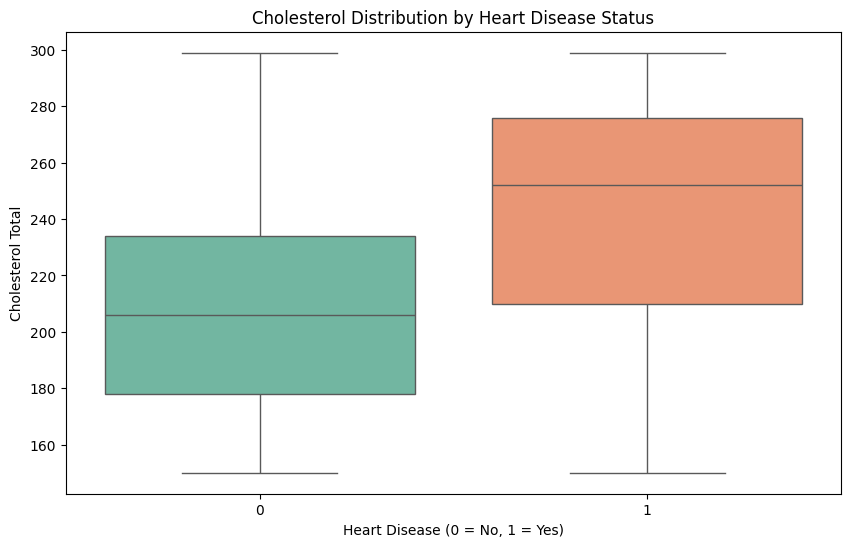

In [45]:

df_plot = x.copy()
df_plot['Heart_Disease'] = y

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='Heart_Disease', y='Cholesterol_Total', palette='Set2')

plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Total')

C:\Users\hp\AppData\Local\Temp\ipykernel_15900\2213173881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Heart_Disease', y='Age', palette='coolwarm')


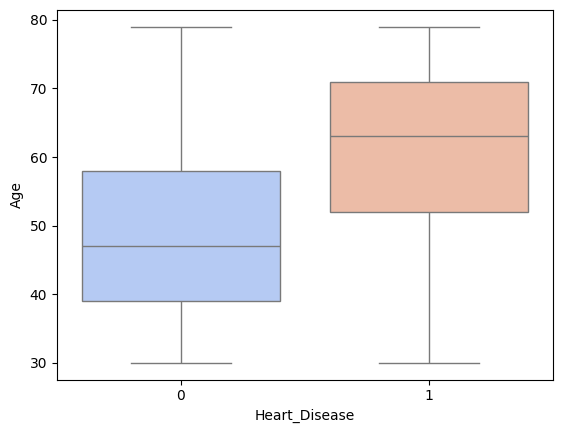

In [46]:
sns.boxplot(data=df_plot, x='Heart_Disease', y='Age', palette='coolwarm')
plt.show()

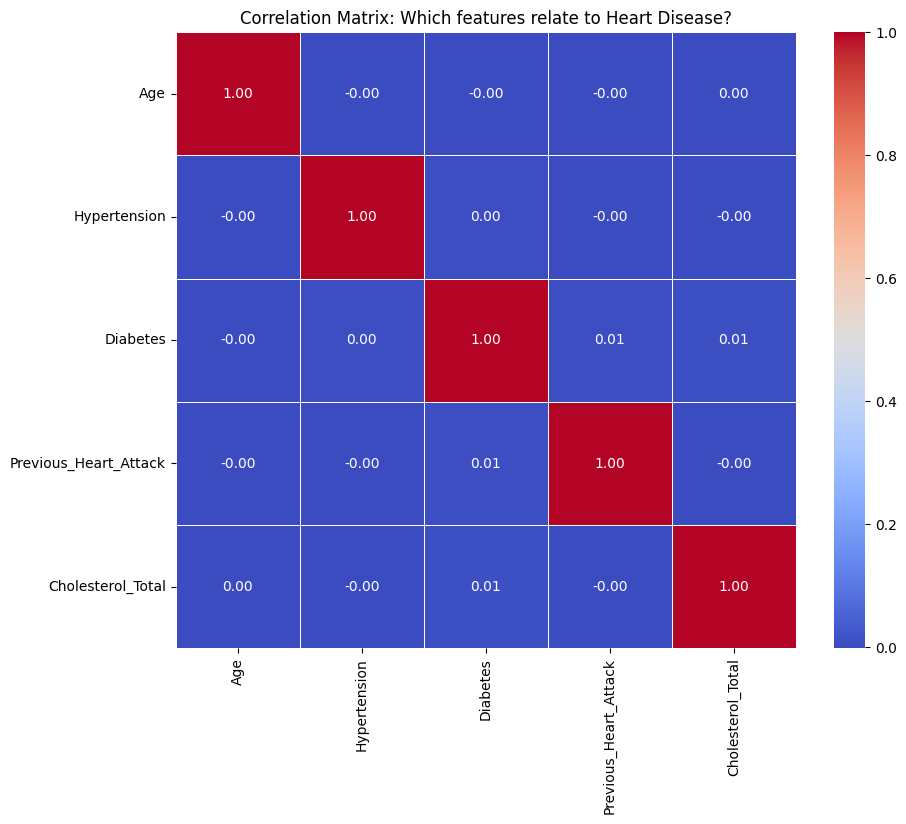

In [47]:
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = X.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Which features relate to Heart Disease?")
plt.show()

*pie chart*

In [48]:
y

Heart_Disease
0                  0
1                  0
2                  0
3                  1
4                  1
...              ...
49995              1
49996              0
49997              0
49998              0
49999              1

[50000 rows x 1 columns]

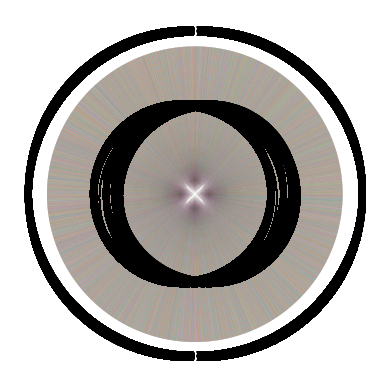

In [49]:
x=df["Gender"]
y= df["Heart_Disease"]
plt.pie(y, labels=x,  autopct='%1.1f%%', startangle=180)
plt.show()

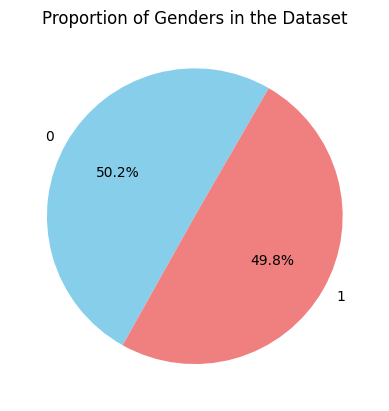

In [50]:

gender_counts = df["Gender"].value_counts()


plt.pie(
    gender_counts.values,
    labels=gender_counts.index, 
    autopct='%1.1f%%',
    startangle=60,
    colors=['skyblue', 'lightcoral']
)
plt.title("Proportion of Genders in the Dataset")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15900\4174120.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")


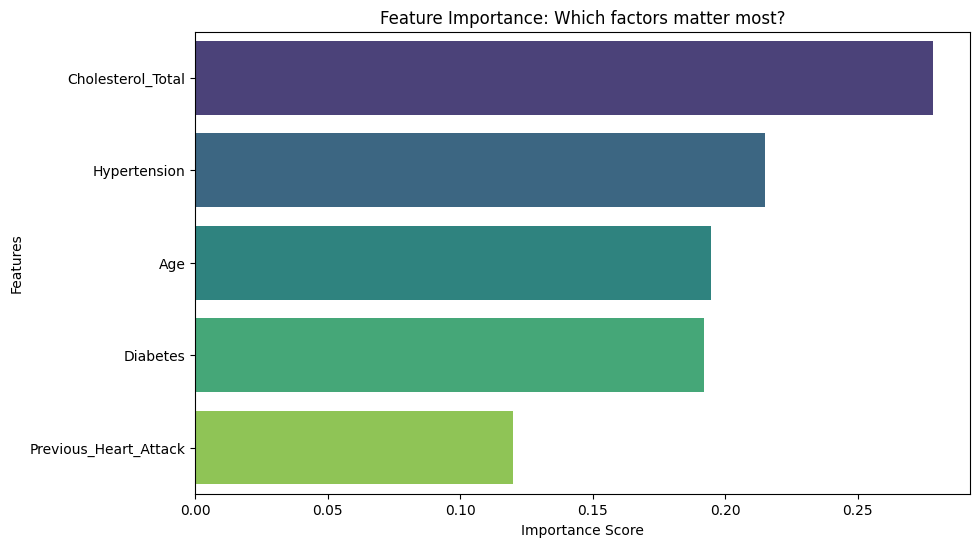

In [51]:

feature_names = ["Age", "Hypertension", "Diabetes", "Previous_Heart_Attack", "Cholesterol_Total"]

scores = np.array([0.19480143, 0.2149715 , 0.1918075 , 0.11988657, 0.278533 ])


feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": scores
})

feature_df = feature_df.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")

plt.title("Feature Importance: Which factors matter most?")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15900\1523218222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Heart_Disease', y='Cholesterol_Total', palette='muted', inner="quartile")


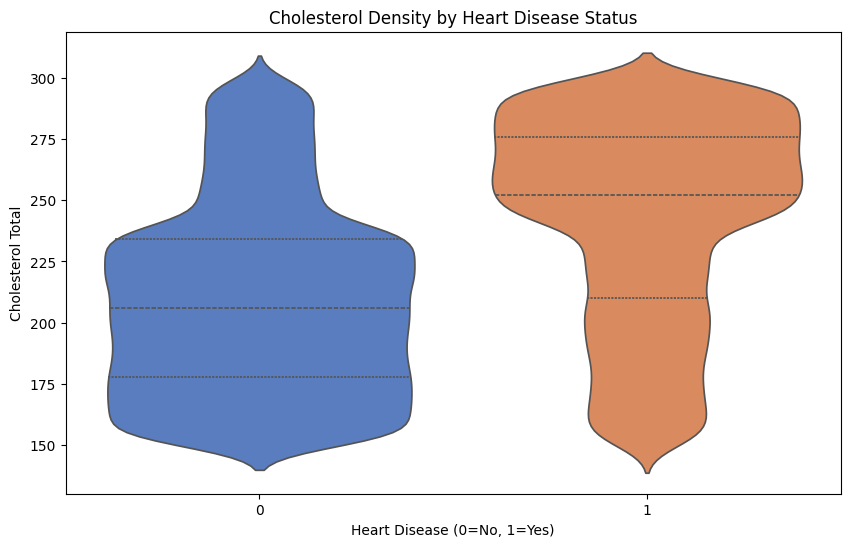

In [52]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Heart_Disease', y='Cholesterol_Total', palette='muted', inner="quartile")

plt.title("Cholesterol Density by Heart Disease Status")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Cholesterol Total")
plt.show()

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x="Cholesterol_Total", y, alpha=0.5) 

plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Cholesterol Total")
plt.ylabel("Heart Disease (0 or 1)")
plt.show()

SyntaxError: positional argument follows keyword argument (1014467010.py, line 4)

In [54]:
plt.plot(x["Cholesterol_Total"],y)
plt.title("Cholesterol Levels: Healthy (0) vs Heart Disease (1)")
plt.show()

KeyError: 'Cholesterol_Total'

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = x.copy()
df_plot['Heart_Disease'] = y

sns.stripplot(data=df_plot, x="Heart_Disease", y="Cholesterol_Total")
plt.title("Cholesterol Levels: Healthy (0) vs Heart Disease (1)")
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [56]:
X

Age  Hypertension  Diabetes  Previous_Heart_Attack  Cholesterol_Total
0       48             0         0                      0                200
1       35             1         0                      0                206
2       79             0         0                      0                208
3       75             0         0                      0                290
4       34             1         1                      0                220
...    ...           ...       ...                    ...                ...
49995   74             0         0                      0                248
49996   53             0         0                      0                252
49997   38             0         0                      0                235
49998   68             0         0                      0                177
49999   53             1         0                      0                280

[50000 rows x 5 columns]

In [57]:
# y

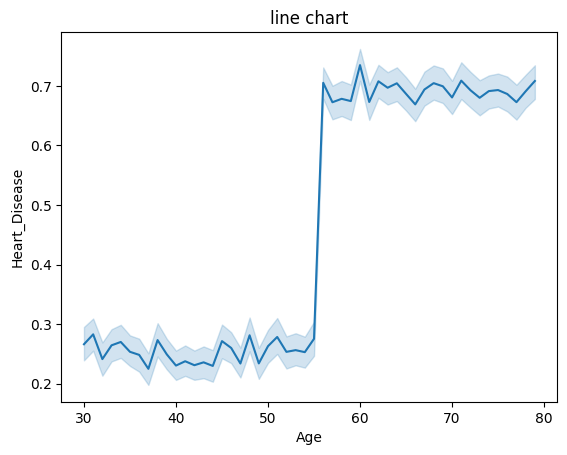

In [58]:
sns.lineplot(x="Age", y= 'Heart_Disease', data=df)

plt.title("line chart")
plt.show()

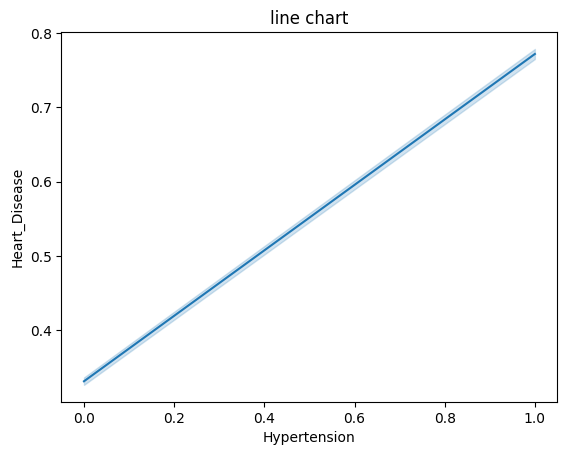

In [59]:
sns.lineplot(x="Hypertension", y= 'Heart_Disease', data=df)

plt.title("line chart")
plt.show()

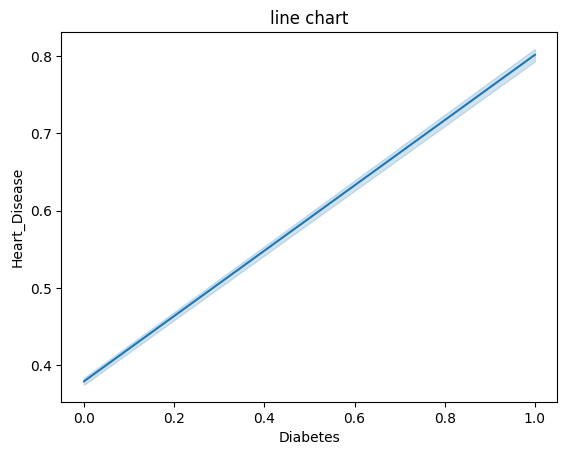

In [60]:
sns.lineplot(x="Diabetes", y= 'Heart_Disease', data=df)

plt.title("line chart")
plt.show()

In [81]:
df.Heart_Disease.unique()
len(df.Cholesterol_Total.unique())

150

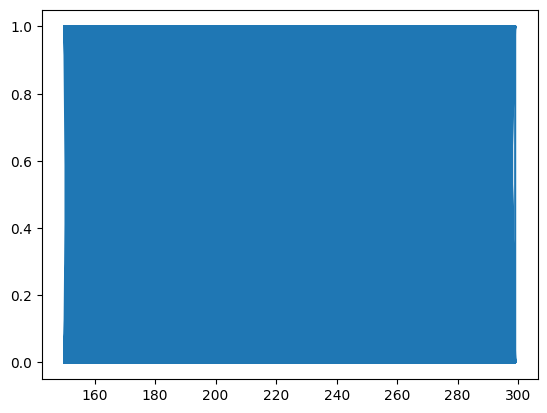

In [87]:
plt.plot(df.Cholesterol_Total , df.Heart_Disease)

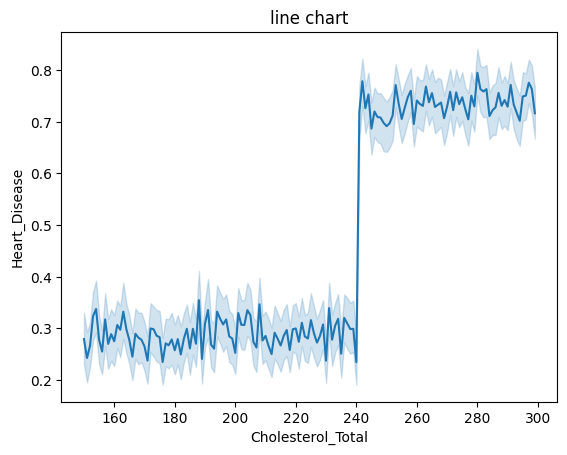

In [85]:
sns.lineplot(x="Cholesterol_Total", y= 'Heart_Disease', data=df)

plt.title("line chart")
plt.show()

In [ ]:

np.random.seed(42)
df = pd.DataFrame({
    "Cholesterol_Total": np.sort(np.random.randint(150, 300, 100)),
    # Simple risk model: higher cholesterol = higher chance of 1
    "Heart_Disease": np.where(df['Cholesterol_Total'] + np.random.normal(0, 30, 100) > 230, 1, 0)
})
+
plt.figure(figsize=(10, 6))

sns.lineplot(
    x="Cholesterol_Total",
    y="Heart_Disease",
    data=df,
    errorbar=None, # Removes the confidence interval shading for a cleaner line
    # If you want to see the confidence interval, use 'errorbar="sd"' or the default 'errorbar="se"'
)

plt.title("Average Heart Disease Risk vs. Cholesterol Total")
plt.xlabel("Cholesterol Total")
plt.ylabel("Average Heart Disease Risk (Proportion of 1s)")
plt.grid(axis='y', linestyle='--')
plt.show()

ValueError: operands could not be broadcast together with shapes (50000,) (100,) 

In [62]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X("Cholesterol_Total", axis=alt.Axis(title="Total Cholesterol Level")),

    y=alt.Y("mean(Heart_Disease)", axis=alt.Axis(title="Mean Heart Disease Incidence (0 to 1)")),

    tooltip=["Cholesterol_Total", "mean(Heart_Disease)"]
).properties(
    title="Line Chart: Mean Heart Disease Incidence by Total Cholesterol"
).interactive() 

chart

NameError: name 'alt' is not defined

In [63]:
s=df.head(1000)

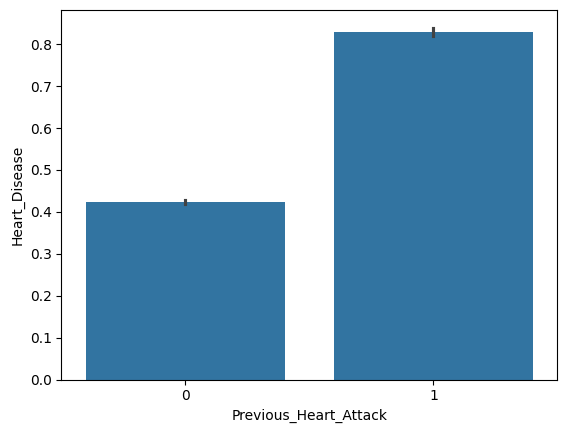

In [64]:
sns.barplot(x="Previous_Heart_Attack", y= 'Heart_Disease', data=df)
plt.show()

In [65]:
X

Age  Hypertension  Diabetes  Previous_Heart_Attack  Cholesterol_Total
0       48             0         0                      0                200
1       35             1         0                      0                206
2       79             0         0                      0                208
3       75             0         0                      0                290
4       34             1         1                      0                220
...    ...           ...       ...                    ...                ...
49995   74             0         0                      0                248
49996   53             0         0                      0                252
49997   38             0         0                      0                235
49998   68             0         0                      0                177
49999   53             1         0                      0                280

[50000 rows x 5 columns]

In [66]:
s=df.head(15)

In [67]:
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [68]:
# (x="Cholesterol_Total", y= 'Heart_Disease', data=s

alt.Chart(df).mark_bar().encode(
    alt.X('Cholesterol_Total'),
    alt.Y('Heart_Disease').sort('x'),
    alt.Color('Alcohol_Intake:N')
)

alt.Chart(...)

In [69]:
df

Age  Gender  Weight  Height   BMI  Smoking  Alcohol_Intake  \
0       48       1      78     157  26.4        2               1   
1       35       0      73     163  33.0        2               1   
2       79       0      88     152  32.3        2               1   
3       75       1     106     171  37.4        2               2   
4       34       0      65     191  18.5        0               1   
...    ...     ...     ...     ...   ...      ...             ...   
49995   74       1     104     155  29.9        0               1   
49996   53       1      95     163  35.8        2               1   
49997   38       0      91     197  32.3        1               1   
49998   68       1     115     152  18.6        2               0   
49999   53       0      81     193  21.7        2               1   

       Physical_Activity  Diet  Stress_Level  ...  Diabetes  Hyperlipidemia  \
0                      2     1             2  ...         0               1   
1                      0     0             0  ...         0               1   
2                      1     0             2  ...         0               0   
3                      1     0             1  ...         0               1   
4                      2     1             1  ...         1               0   
...                  ...   ...           ...  ...       ...             ...   
49995                  0     0             2  ...         0               0   
49996                  1     1             1  ...         0               1   
49997                  1     2             1  ...         0               0   
49998                  1     0             2  ...         0               0   
49999                  1     0             1  ...         0               0   

       Family_History  Previous_Heart_Attack  Systolic_BP  Diastolic_BP  \
0                   1                      0          104            99   
1                   1                      0          111            72   
2                   1                      0          116           102   
3                   0                      0          171            92   
4                   0                      0          164            67   
...               ...                    ...          ...           ...   
49995               0                      0          127            80   
49996               0                      0          141            96   
49997               0                      0          178            94   
49998               0                      0          118           110   
49999               0                      0          108           111   

       Heart_Rate  Blood_Sugar_Fasting  Cholesterol_Total  Heart_Disease  
0              71                  165                200              0  
1              60                  145                206              0  
2              78                  148                208              0  
3             109                  105                290              1  
4             108                  116                220              1  
...           ...                  ...                ...            ...  
49995          83                  174                248              1  
49996          70                  148                252              0  
49997          90                   75                235              0  
49998         106                  113                177              0  
49999          87                  172                280              1  

[50000 rows x 21 columns]

In [70]:
alt.Chart(df).mark_bar().encode(
    alt.X('mean(Height):Q'),
    alt.Y('Smoking'),
    alt.Color('Physical_Activity:N')
)

alt.Chart(...)

In [71]:

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='n_splits', y='Accuracy', data=df_results, palette="viridis")
# plt.title('Model Accuracy Distribution vs. Number of Splits')
# plt.xlabel('Number of Splits (K-Folds)')
# plt.ylabel('Accuracy Score')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [1]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 9.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 24.4 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------ --------------------------------- 6.6/38.1 MB 30.5 MB/s eta 0:00:02
   --------------- ------------------------ 14.7/38.1 MB 34.1 MB/s eta 0:00:01
   -------------------- ------------------- 19.1/38.1 MB 30.1 MB/s eta 0:00:01
   ------------------------- -------------- 23.9/38.1 MB 28.5 MB/s eta 0:00:01
   -------------------------------- ------- 30.7/38.1 MB 29.3 MB/s eta 0:00:01
   -------------------------------------- - 36.4/38.1 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 26.8 MB/s  0:00:01

   ---------------------------------------- 0/5 [slicer]
   -------- --------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
